In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [40]:
air=pd.read_csv("Eastwestairline.csv")

In [41]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
air.shape

(3999, 12)

In [44]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [46]:
air_df=norm_fun(air.iloc[:,1:])

In [47]:
air_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


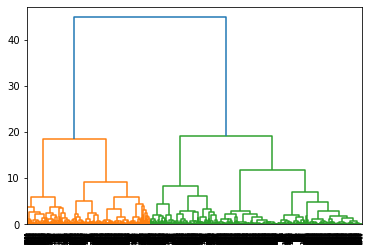

In [48]:
dendrogram=sch.dendrogram(sch.linkage(air_df,method="ward"))

In [66]:
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")

In [67]:
hc.fit_predict(air_df)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [68]:
y_hc=hc.fit_predict(air_df)

In [69]:
air["clusterid"]=y_hc

In [70]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [71]:
air["clusterid"].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: clusterid, dtype: int64

# K-means Clustering

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [73]:
data=pd.read_csv("Eastwestairline.csv")

In [100]:
nc=[2,3,4,5,6,7,8,9,10,11]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(data)
    iner.append(km.inertia_)

In [101]:
iner

[20828852109153.254,
 11798705486846.504,
 7554668300957.383,
 5729561219811.842,
 4546507943631.053,
 3702280351746.51,
 3276949228278.5684,
 2902554472362.226,
 2634233566444.285,
 2385343443678.2393]

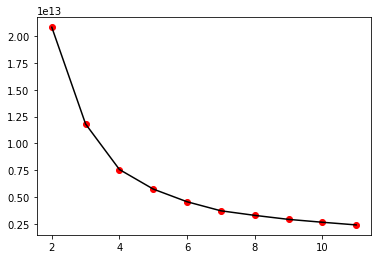

In [102]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [103]:
clusters4=KMeans(4,random_state=30).fit(data)
clusters4

KMeans(n_clusters=4, random_state=30)

In [104]:
clusters4.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [115]:
air4=air.copy()
air4['clusters4_id']=clusters4.labels_
air4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid,clusters4_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [116]:
clusters4.cluster_centers_

array([[1.68001518e+03, 1.27878638e+05, 2.17636640e+02, 2.93825911e+00,
        1.00910931e+00, 1.03238866e+00, 3.11420273e+04, 1.64838057e+01,
        7.48964575e+02, 2.14271255e+00, 4.73614372e+03, 4.41295547e-01,
        1.97570850e+00, 1.97570850e+00],
       [2.19447250e+03, 3.08323096e+04, 1.01988571e+02, 1.66571429e+00,
        1.01642857e+00, 1.00500000e+00, 1.00775100e+04, 9.31464286e+00,
        2.90848571e+02, 8.84642857e-01, 3.78544393e+03, 3.23928571e-01,
        1.76785714e+00, 1.76785714e+00],
       [8.63423077e+02, 8.42320231e+05, 5.12692308e+02, 3.34615385e+00,
        1.00000000e+00, 1.11538462e+00, 5.77971923e+04, 2.27307692e+01,
        1.84588462e+03, 6.96153846e+00, 6.46300000e+03, 8.46153846e-01,
        1.69230769e+00, 1.69230769e+00],
       [1.24560000e+03, 3.23009849e+05, 3.37248649e+02, 3.14594595e+00,
        1.01621622e+00, 1.00000000e+00, 4.36441189e+04, 1.85837838e+01,
        1.28333514e+03, 3.88108108e+00, 5.53258378e+03, 6.27027027e-01,
        1.989

In [117]:
air4.groupby('clusters4_id').agg(['mean']).reset_index()


,clusters4_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1680.015182,127878.637652,217.636640,2.938259,1.009109,1.032389,31142.027328,16.483806,748.964575,2.142713,4736.143725,0.441296,0.740891
1,1,2194.472500,30832.309643,101.988571,1.665714,1.016429,1.005000,10077.510000,9.314643,290.848571,0.884643,3785.443929,0.323929,0.643571
2,2,863.423077,842320.230769,512.692308,3.346154,1.000000,1.115385,57797.192308,22.730769,1845.884615,6.961538,6463.000000,0.846154,1.192308
3,3,1245.600000,323009.848649,337.248649,3.145946,1.016216,1.000000,43644.118919,18.583784,1283.335135,3.881081,5532.583784,0.627027,0.994595


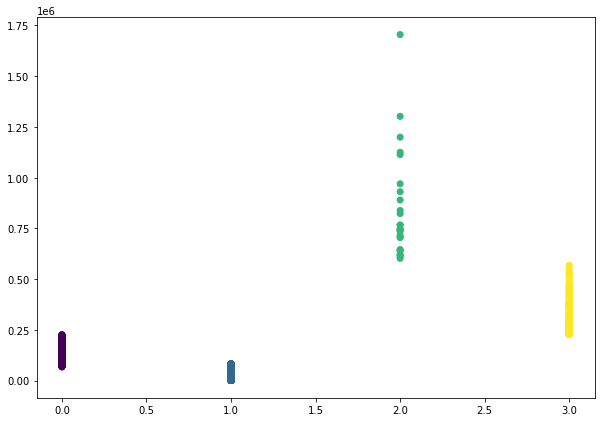

In [118]:
plt.figure(figsize=(10, 7))  
plt.scatter(air4['clusters4_id'],air4['Balance'], c=clusters4.labels_)

# DBSCAN

In [114]:
from sklearn.cluster import DBSCAN

In [120]:
data1=pd.read_csv("Eastwestairline.csv")

In [132]:
scaler = StandardScaler().fit(data1)
air_norm = scaler.transform(data1)

In [133]:
air1_df=norm_fun(data1.iloc[:,1:])

In [134]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(air1_df)

DBSCAN(eps=0.82, min_samples=6)

In [135]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [136]:
air3 = pd.DataFrame(dbscan.labels_,columns=['cluster_id'])
air3.value_counts()

cluster_id
0             2518
1             1481
dtype: int64